In [1]:
import sys
if sys.platform.startswith('linux'): # or win
    print("in linux")
    file_path = "/home/ncslaber/109-2/tree_experiment/npy_depth/npy/"
#     sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')

in linux


In [2]:
'''math tool'''
import csv
import numpy as np
import time

'''plot tool'''
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.ticker as ticker

'''image tool'''
import cv2
import statistics # as sta

import time

In [3]:
def world(npDepth):
    '''world coordinate'''
    cx_d = 328 #424
    cy_d = 241 #241
    fx_d = 617 #424
    fy_d = 617 #424
    npPointX = np.asarray(range(640))-cx_d
    npPointX = np.diag(npPointX)
    npPointX = npDepth.dot(npPointX)/ fx_d * (-1)

    npPointY = np.asarray(range(480))-cy_d
    npPointY = np.diag(npPointY)

    theta = 0/180*np.pi
    npPointY = npPointY.dot(npDepth)/ fy_d * (-1) 
    npPointY = npPointY*np.cos(theta) + npDepth * np.sin(theta) + 360
    npPointY = npPointY.astype('float16')

    '''filter out 5mm'''
    npHeight = np.copy(npPointY)
    npHeight = npHeight.astype('float32')

    ret, npHeight_binary = cv2.threshold(npHeight, 5, 255, cv2.THRESH_BINARY)
    npHeight_binary = npHeight_binary.astype('uint8')
    return npHeight_binary

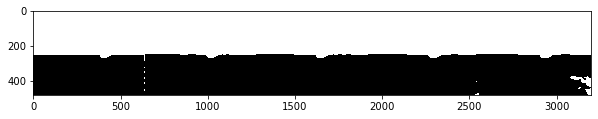

In [4]:
'''initialize'''
npDepth1 = np.load(file_path+"8_8.npy")
npDepthF1 = cv2.convertScaleAbs(npDepth1, alpha=0.085)
npHeight_binary1 = world(npDepth1)

npDepth2 = np.load(file_path+"9_0.npy")
npDepthF2 = cv2.convertScaleAbs(npDepth2, alpha=0.085)
npHeight_binary2 = world(npDepth2)

npDepth3 = np.load(file_path+"9_2.npy")
npDepthF3 = cv2.convertScaleAbs(npDepth3, alpha=0.085)
npHeight_binary3 = world(npDepth3)

npDepth4 = np.load(file_path+"9_4.npy")
npDepthF4 = cv2.convertScaleAbs(npDepth4, alpha=0.085)
npHeight_binary4 = world(npDepth4)

npDepth5 = np.load(file_path+"9_6.npy")
npDepthF5 = cv2.convertScaleAbs(npDepth5, alpha=0.085)
npHeight_binary5 = world(npDepth5)

moving_avg = np.hstack([npHeight_binary1, npHeight_binary2, npHeight_binary3, npHeight_binary4, npHeight_binary5])
fig = plt.subplots(figsize=(10,25))
plt.imshow(cv2.cvtColor(moving_avg,cv2.COLOR_BGR2RGB))

[[1275 1275 1275 ... 1275 1275 1275]
 [1275 1275 1275 ... 1275 1275 1275]
 [1275 1275 1275 ... 1275 1275 1275]
 ...
 [   0    0    0 ...  255  255  765]
 [   0    0    0 ...  255  255  765]
 [1275 1275 1275 ...  255  255  765]]


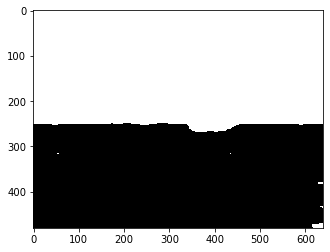

In [5]:
# build model
npHeight_binary1 = npHeight_binary1.astype('uint32')
npHeight_binary2 = npHeight_binary2.astype('uint32')
npHeight_binary3 = npHeight_binary3.astype('uint32')
npHeight_binary4 = npHeight_binary4.astype('uint32')
npHeight_binary5 = npHeight_binary2.astype('uint32')
param_model = npHeight_binary1+npHeight_binary2+npHeight_binary3+npHeight_binary4+npHeight_binary5
print(param_model)
param_model = param_model/5
moving_avg = np.zeros_like(param_model)
moving_avg[param_model<=0.5]=int(0)
moving_avg[param_model>0.5]=int(255)

moving_avg = moving_avg.astype('uint8')
plt.imshow(cv2.cvtColor(moving_avg,cv2.COLOR_BGR2RGB))

<class 'numpy.ndarray'>


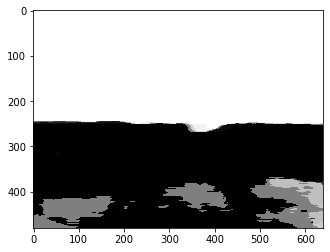

In [9]:
'''new input'''
npDepth = np.load(file_path+"9_8.npy")
npDepthF = cv2.convertScaleAbs(npDepth, alpha=0.085)
npHeight_binary = world(npDepth)
print(type(npHeight_binary))

'''update'''
alpha=0.5
param_model = (1-alpha)*param_model+alpha*npHeight_binary
param_model = param_model.astype('uint8')
plt.imshow(cv2.cvtColor(param_model,cv2.COLOR_BGR2RGB))

uint8


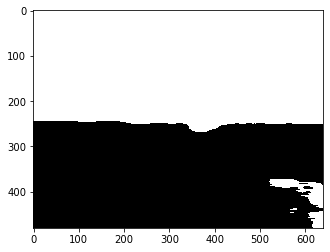

In [10]:
moving_avg[param_model<=130]=int(0)
moving_avg[param_model>130]=int(255)
print(moving_avg.dtype)
plt.imshow(cv2.cvtColor(moving_avg,cv2.COLOR_BGR2RGB))

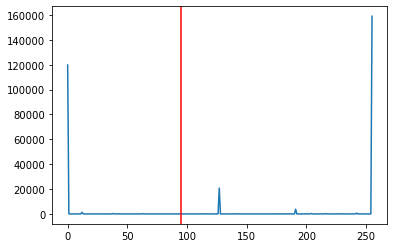

In [11]:
hog = np.zeros(256)
for i in range(param_model.shape[0]):
    for j in range(param_model.shape[1]):
        index = param_model[i][j]
        hog[index] = hog[index]+1
plt.plot(hog)
plt.axvline(95, color = 'r') # 191